In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


In [2]:
ds = pd.read_csv('C:\\Users\\AANCHAL BORSE\\OneDrive\\Documents\\notebook vscode\\dating.csv')  # path


In [3]:
ds.head() 

,gender,age,income,goal,career,met,attr,fun,intel,prob,amb,shar,like,dec
0,0,21,69487,2,0,2,6.0,7.0,7.0,6.0,6.0,5.0,7.0,1
1,0,21,69487,2,0,1,7.0,8.0,7.0,5.0,5.0,6.0,7.0,1
2,0,21,69487,2,0,1,5.0,8.0,9.0,0.0,5.0,7.0,7.0,1
3,0,21,69487,2,0,2,7.0,7.0,8.0,6.0,6.0,8.0,7.0,1
4,0,21,69487,2,0,2,5.0,7.0,7.0,6.0,6.0,6.0,6.0,1


In [4]:
df =pd.DataFrame(ds)

In [5]:
duplicates = df.duplicated()
# Remove duplicate rows (excl the first occurrence)
df= df[~duplicates]

In [6]:
df['career'] = pd.to_numeric(df['career'], errors='coerce')
df.head()

,gender,age,income,goal,career,met,attr,fun,intel,prob,amb,shar,like,dec
0,0,21,69487,2,0,2,6.0,7.0,7.0,6.0,6.0,5.0,7.0,1
1,0,21,69487,2,0,1,7.0,8.0,7.0,5.0,5.0,6.0,7.0,1
2,0,21,69487,2,0,1,5.0,8.0,9.0,0.0,5.0,7.0,7.0,1
3,0,21,69487,2,0,2,7.0,7.0,8.0,6.0,6.0,8.0,7.0,1
4,0,21,69487,2,0,2,5.0,7.0,7.0,6.0,6.0,6.0,6.0,1


In [7]:
df = df.fillna(df.median())  # Replace with median 

In [8]:
df.head()

,gender,age,income,goal,career,met,attr,fun,intel,prob,amb,shar,like,dec
0,0,21,69487,2,0,2,6.0,7.0,7.0,6.0,6.0,5.0,7.0,1
1,0,21,69487,2,0,1,7.0,8.0,7.0,5.0,5.0,6.0,7.0,1
2,0,21,69487,2,0,1,5.0,8.0,9.0,0.0,5.0,7.0,7.0,1
3,0,21,69487,2,0,2,7.0,7.0,8.0,6.0,6.0,8.0,7.0,1
4,0,21,69487,2,0,2,5.0,7.0,7.0,6.0,6.0,6.0,6.0,1


In [9]:

df.dtypes

gender      int64
age         int64
income      int64
goal        int64
career      int64
met         int64
attr      float64
fun       float64
intel     float64
prob      float64
amb       float64
shar      float64
like      float64
dec         int64
dtype: object

In [21]:
# split the data
X=df.iloc[:,:13].values   # independent parameters/cols
y=df.iloc[:,-1].values    # dependent parameters

In [22]:
# Separate features and target
features = df.drop('dec', axis=1)
target = df['dec']


In [23]:
# from sklearn.model_selection import GridSearchCV
# scaler = StandardScaler()

# X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.2, random_state=68)
# # X_train=scaler.fit_transform(X_train)
# # X_test=scaler.fit_transform(X_test)

# param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
# grid = GridSearchCV(SVC(),param_grid)
# # grid.fit(X_train,y_train)


In [24]:
# grid.fit(X_train,y_train)


In [51]:
def train_and_test_svm_ensemble(data_frame, target_column_name):
  """
  Trains and evaluates an ensemble of SVM classifiers with different kernels.
  Returns a tuple containing the trained ensemble and the accuracy on the test data.
  """

  # Separate features and target
  features = data_frame.drop(target_column_name, axis=1)
  target = data_frame[target_column_name]

  # Standard scaling
  scaler = StandardScaler()
  
  # Define SVM models with different kernels and parameters
  svm_linear = svm.SVC(kernel='linear', C=10)
  svm_rbf = svm.SVC(kernel='rbf', C=100, gamma=0.01)
  svm_poly = svm.SVC(kernel='poly', C=0.1, degree=3)

  # Create VotingClassifier ensemble
  ensemble = VotingClassifier(estimators=[
      ('svm_linear', svm_linear),
      ('svm_rbf', svm_rbf),
      ('svm_poly', svm_poly)
  ], voting='hard')

  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.2, random_state=68)
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.fit_transform(X_test)
  # Train the ensemble
  ensemble.fit(X_train, y_train)

  # Evaluate on test data
  y_pred = ensemble.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  return ensemble, accuracy * 100  # Ensemble accuracy

# main code
ensemble, test_accuracy = train_and_test_svm_ensemble(df.copy(), "dec")  # Replace "dec" with actual target name

print("Accuracy:", test_accuracy)  # Ensemble Afccuracy

Accuracy: 79.11275415896488


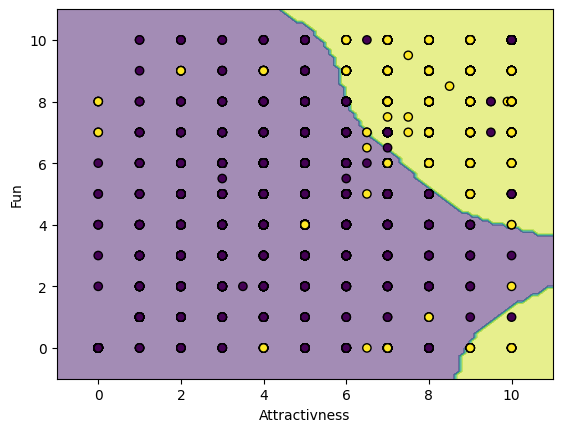

In [52]:
from sklearn.inspection import DecisionBoundaryDisplay

# Specify feature columns and target column
features = [6, 7]
target = -1

# Extract feature matrix and target vector
X = df.iloc[:, features].to_numpy()
y = df.iloc[:, target].to_numpy()

# Initialize and train the SVC
svc_model = SVC()
svc_model.fit(X, y)

# Display decision boundary using the trained classifier
decision_boundary = DecisionBoundaryDisplay.from_estimator(
    svc_model, X, response_method="predict",
    xlabel='Attractivness', ylabel='Fun',
    alpha=0.5,
)

# Scatter plot of the data points
decision_boundary.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

plt.show()